In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("cm_GTR_R4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          1.4585 ( 1.2176,  1.8798) ( 1.1747,  1.7768)  0.6021 (Jnode 142)\n',
 't_n74          1.3844 ( 1.1735,  1.7717) ( 1.1415,  1.6795)  0.5380 (Jnode 141)\n',
 't_n75          1.1943 ( 1.0347,  1.4882) ( 1.0136,  1.4133)  0.3997 (Jnode 140)\n',
 't_n76          1.1475 ( 0.9993,  1.4230) ( 0.9760,  1.3448)  0.3688 (Jnode 139)\n',
 't_n77          0.9642 ( 0.8376,  1.2283) ( 0.8094,  1.1364)  0.3270 (Jnode 138)\n',
 't_n78          0.8912 ( 0.7840,  1.1086) ( 0.7657,  1.0378)  0.2721 (Jnode 137)\n',
 't_n79          0.6702 ( 0.6369,  0.6986) ( 0.6391,  0.7002)  0.0611 (Jnode 136)\n',
 't_n80          0.5791 ( 0.5283,  0.6169) ( 0.5335,  0.6202)  0.0867 (Jnode 135)\n',
 't_n81          0.5281 ( 0.4707,  0.5723) ( 0.4791,  0.5780)  0.0989 (Jnode 134)\n',
 't_n82          0.4650 ( 0.4044,  0.5159) ( 0.4073,  0.5180)  0.1107 (Jnode 133)\n',
 't_n83          0.4390 ( 0.3745,  0.4937) ( 0.3765,  0.4949)  0.1184 (Jnode 132)\n',
 't_n84          0.4144 ( 0.3458,  0.4730) ( 0.3521,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[1.4585,
 1.3844,
 1.1943,
 1.1475,
 0.9642,
 0.8912,
 0.6702,
 0.5791,
 0.5281,
 0.465,
 0.439,
 0.4144,
 0.369,
 0.2581,
 0.2109,
 0.0916,
 0.0326,
 0.2729,
 0.2294,
 0.254,
 0.5242,
 0.3466,
 0.0678,
 0.3179,
 0.3003,
 0.6577,
 0.8516,
 0.8097,
 0.789,
 0.7616,
 0.7307,
 0.6199,
 0.3786,
 0.6425,
 0.5346,
 0.4907,
 0.2681,
 0.4934,
 0.2161,
 0.6094,
 0.4817,
 0.2542,
 0.0993,
 0.0555,
 0.503,
 0.313,
 0.2989,
 0.3897,
 0.164,
 1.133,
 0.7441,
 0.5975,
 0.5861,
 0.5611,
 0.4861,
 0.5537,
 0.3533,
 0.5571,
 0.5298,
 0.5085,
 0.4268,
 0.2592,
 0.1146,
 0.5063,
 0.9968,
 1.0979,
 0.8917,
 0.6232,
 1.0815,
 0.6734,
 0.4289]

In [7]:
lower_ci_iqtree

[1.2176,
 1.1735,
 1.0347,
 0.9993,
 0.8376,
 0.784,
 0.6369,
 0.5283,
 0.4707,
 0.4044,
 0.3745,
 0.3458,
 0.2961,
 0.1946,
 0.152,
 0.0534,
 0.0171,
 0.1823,
 0.1389,
 0.1635,
 0.4665,
 0.2437,
 0.0281,
 0.2121,
 0.1798,
 0.6244,
 0.7417,
 0.7028,
 0.6834,
 0.6581,
 0.6287,
 0.4989,
 0.1988,
 0.5464,
 0.4442,
 0.4008,
 0.1776,
 0.4036,
 0.1067,
 0.5032,
 0.373,
 0.1927,
 0.0935,
 0.0466,
 0.2519,
 0.1143,
 0.1081,
 0.3218,
 0.0688,
 0.9878,
 0.5897,
 0.497,
 0.4849,
 0.4575,
 0.3572,
 0.4491,
 0.2038,
 0.4564,
 0.4323,
 0.4144,
 0.3481,
 0.2045,
 0.0771,
 0.4651,
 0.8085,
 0.9421,
 0.7356,
 0.5003,
 0.924,
 0.4687,
 0.2409]

In [8]:
upper_ci_iqtree

[1.8798,
 1.7717,
 1.4882,
 1.423,
 1.2283,
 1.1086,
 0.6986,
 0.6169,
 0.5723,
 0.5159,
 0.4937,
 0.473,
 0.432,
 0.3191,
 0.2714,
 0.1395,
 0.0562,
 0.3462,
 0.3085,
 0.3297,
 0.5688,
 0.4532,
 0.1411,
 0.4363,
 0.4129,
 0.6836,
 1.0948,
 1.0463,
 1.0202,
 0.984,
 0.9396,
 0.7581,
 0.5553,
 0.7853,
 0.6179,
 0.5693,
 0.3668,
 0.5718,
 0.3286,
 0.7866,
 0.6198,
 0.344,
 0.104,
 0.0639,
 0.7075,
 0.5336,
 0.5258,
 0.5462,
 0.3064,
 1.3912,
 1.3561,
 0.6636,
 0.652,
 0.6282,
 0.5713,
 0.6213,
 0.4943,
 0.6238,
 0.5965,
 0.5758,
 0.4946,
 0.286,
 0.1551,
 0.6449,
 1.1975,
 1.318,
 1.0725,
 0.8277,
 1.2954,
 0.9376,
 0.5633]

In [9]:
file_LG = open("cm_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

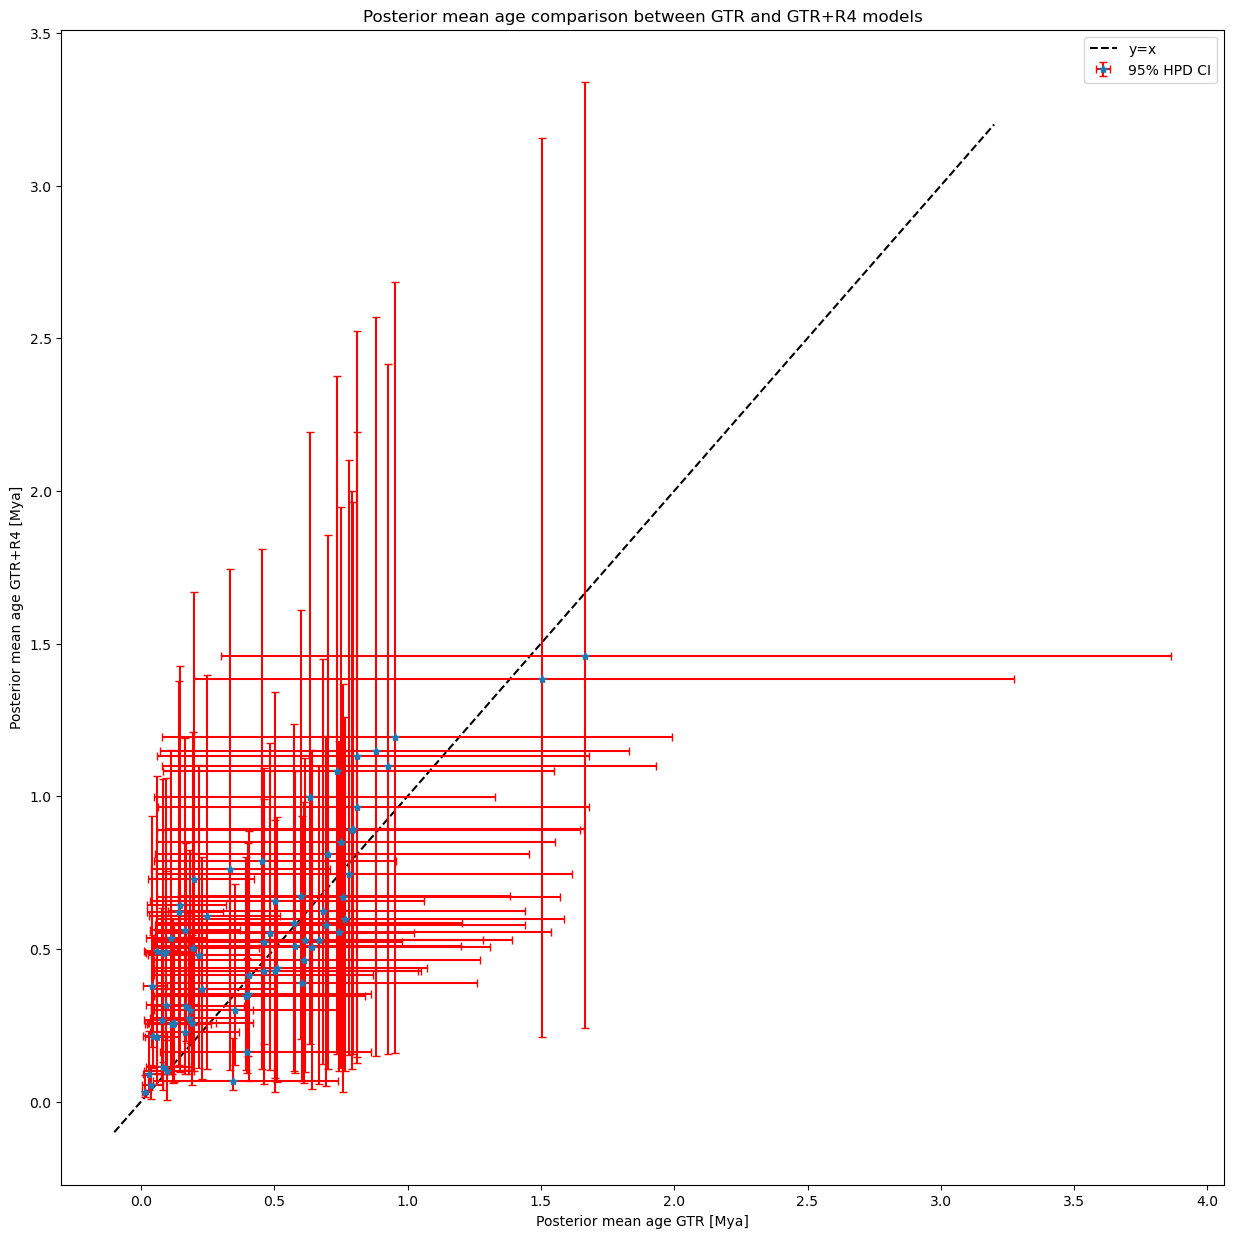

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_R4.png')

In [11]:
posterior_mean_baseml

[1.6653,
 1.506,
 0.9543,
 0.8799,
 0.8099,
 0.793,
 0.7565,
 0.6928,
 0.6682,
 0.6098,
 0.5096,
 0.4069,
 0.2278,
 0.125,
 0.062,
 0.0319,
 0.015,
 0.1788,
 0.1648,
 0.1165,
 0.4624,
 0.3951,
 0.3459,
 0.0945,
 0.3522,
 0.5034,
 0.7487,
 0.7013,
 0.453,
 0.3342,
 0.1981,
 0.1424,
 0.0433,
 0.1477,
 0.1121,
 0.095,
 0.0794,
 0.0613,
 0.0449,
 0.2461,
 0.2166,
 0.1186,
 0.096,
 0.0388,
 0.1954,
 0.1702,
 0.1858,
 0.6032,
 0.3966,
 0.8105,
 0.7817,
 0.7667,
 0.5758,
 0.1644,
 0.0819,
 0.4852,
 0.4021,
 0.7429,
 0.6172,
 0.5768,
 0.5018,
 0.1898,
 0.0815,
 0.641,
 0.6353,
 0.9276,
 0.7943,
 0.6828,
 0.7358,
 0.5992,
 0.463]

In [12]:
posterior_mean_iqtree

[1.4585,
 1.3844,
 1.1943,
 1.1475,
 0.9642,
 0.8912,
 0.6702,
 0.5791,
 0.5281,
 0.465,
 0.439,
 0.4144,
 0.369,
 0.2581,
 0.2109,
 0.0916,
 0.0326,
 0.2729,
 0.2294,
 0.254,
 0.5242,
 0.3466,
 0.0678,
 0.3179,
 0.3003,
 0.6577,
 0.8516,
 0.8097,
 0.789,
 0.7616,
 0.7307,
 0.6199,
 0.3786,
 0.6425,
 0.5346,
 0.4907,
 0.2681,
 0.4934,
 0.2161,
 0.6094,
 0.4817,
 0.2542,
 0.0993,
 0.0555,
 0.503,
 0.313,
 0.2989,
 0.3897,
 0.164,
 1.133,
 0.7441,
 0.5975,
 0.5861,
 0.5611,
 0.4861,
 0.5537,
 0.3533,
 0.5571,
 0.5298,
 0.5085,
 0.4268,
 0.2592,
 0.1146,
 0.5063,
 0.9968,
 1.0979,
 0.8917,
 0.6232,
 1.0815,
 0.6734,
 0.4289]

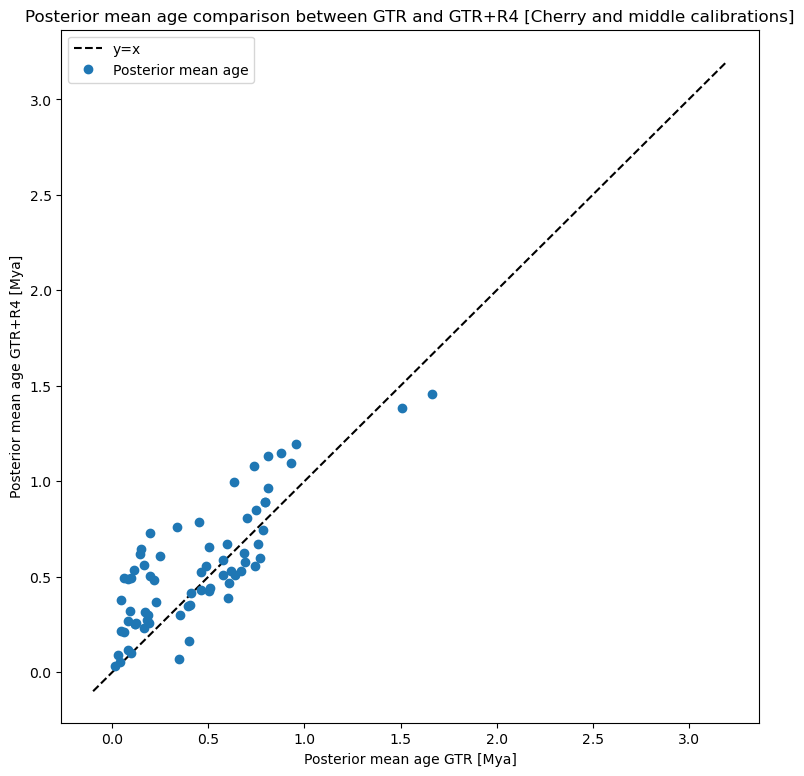

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_age_comparison_GTR_R4_scatter.png')

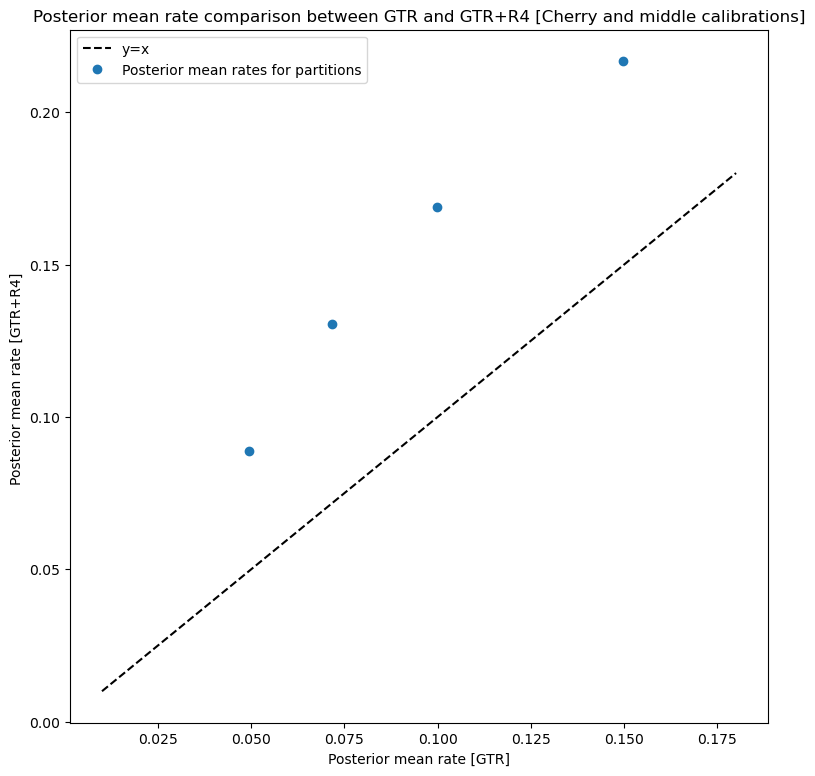

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+R4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+R4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./co_mammals_posterior_mean_rate_comparison_GTR_R4_all_scatter.png')